# Regression

Regression analysis is a form of predictive modelling technique which investigates the significant relationship between a dependent (target) and independent variable(s) (predictor). 

**Linear Regression** is one of the simplest and most commonly used for modeling techniques. It establishes a relationship between dependent variable (Y) and one or more independent variables (X) using a best fit straight line (also known as regression line). It is represented by an equation:

$$\hat y=\beta_0 + \beta_1x_1 + \epsilon$$

- **$\hat y$:** Dependent/target/response variable
- **$\alpha$:** y intercept/constant
- **$\beta$:** Slope of the line explains the change in y when x changes by one unit.
- **$x$:** Independent variable or Predictor
- **$\epsilon$:** Error term is the value needed to correct for a prediction error between the observed and predicted value.

A **Multivariate Linear Regression** has (>1) independent variables model, with n predictor variables X1, X2, ..., Xn and a response Y , can be written as:


$$\hat y=\beta_0 + \beta_1x_1 + \beta_2x_2  + ... + \beta_nx_n + \epsilon $$



There are reasons for using Regression.:
- It is used when we want to predict the value of a variable based on the value of another variable. The variable we want to predict is called the dependent variable (or sometimes, the outcome variable). The variable we are using to predict the other variable's value is called the independent variable (or sometimes, the predictor variable).
- It shows how significant is the relationship between both dependent and independent variables.
- It helps to understand the level of impact between the multiple independent variables to the dependent variable and how strong the relation is.

## Linear Regression

Linear regression is one of the most popular ways to create a model and it is one of the regression technique that people start to learn predictive modeling. 

- Target value has to be continuous.
- Predictor values can be either continuous or discrete variable.


For a starter like me, Linear Regression seems to fit as best regression to be implemented for the first time. There are various ways to implement linear regression. But in this project I am going to use scikit-learn, statsmodel, numpy, or scipy to perform linear regression.

**Scikit-learn**: A powerful Python module for machine learning. It contains function for regression, classification, clustering, model selection and dimensionality reduction. 

____


## Predicting Boston Housing Price

I will use Boston Housing data set, the data set contains information about the housing values in suburbs of Boston. This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University. 



## Data Structure

Each row in the data table is taken from a census tract (or town) in the Boston area. The response of interest is the continuous variable PRICE, which is the median home value (in $1,000) for towns in the Boston area in the 1970s. 


Number of instances: 506

Attributes: 13

- CRIM: Per capita crime rate by town
- ZN: Proportion of a town’s residential area zoned for lots larger than 25,000 square feet
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable. This is a 0/1 binary variable
    - If the town bounds on the Charles River, the value is 0;
    - otherwise the value is 1
- NOX: Nitric oxides concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five employment centers in the Boston region
- RAD: Radial Index of accessibility to radial highways
- TAX: Full value property tax rate (per $10,000)
- PTRATIO: Pupil-to-teacher ratio by town school district
- B: Function of proportion of blacks by town.
- LSTAT: Proportion of population that is 'lower status' that is, proportion of adults without some high school education or that are classified as laborers

## Exploring Boston Housing Data Set 

Import the required Python libraries 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="white")


from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

import warnings; warnings.simplefilter('ignore')

The Boston Housing Data Set is available in sklearn Python module, so I will access it using scikitlearn. I am going to import Boston data set and store it in a variable called boston.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

As we can see it return (506, 13), that means there are 506 instances(rows) of data with 13 attributes or features(columns).

In [3]:
# Return the size of the dataset with the column size.
boston.data.shape

(506, 13)

Now we want to know what are the 13 columns.

In [4]:
# Print the feature names of boston dataset.
print (boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


I am going to convert boston.data into a pandas DataFrame.

In [5]:
df_boston = pd.DataFrame(boston.data)
df_boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


As you can see the column only showing its index and not its names, so I am going to replace those numbers with the feature names.

In [6]:
df_boston.columns = boston.feature_names
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


boston.target contains the housing prices so I am going to add new column 'PRICE' to the DataFrame.

In [7]:
df_boston['PRICE'] = boston.target
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The data in the column **'CHAS'** are categorical data. 

In [8]:
df_boston['CHAS']=df_boston['CHAS'].astype('object')

In [9]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


There are no missing values.

In [10]:
#df_boston.dtypes.value_counts()
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null object
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(13), object(1)
memory usage: 55.4+ KB


### Numeric features

In [11]:
numerical_features = df_boston.columns[df_boston.dtypes != object]
numerical_features = numerical_features.drop(['PRICE'])
numerical_features

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

## Summary Statistics
To get more detailed statistical information from each column, describe() function can be used. It displays the summary statistics like minimum value, maximum value, mean, and the quartiles values for each column in our dataset.

In [12]:
df_boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
PTRATIO,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000


## Assumptions
Every statistical test has what are known as **"assumptions"** that must be met if the test can be used. Therefore, part of the data process involves checking to make sure that your data doesn't fail these assumptions.

- **Linearity:** A linear relationship exists between the dependent and predictor variables. If no linear relationship exists, linear regression isn't the correct model to explain the data.
- **No multicollinearity:** Predictor variables are not collinear, (they aren't highly correlated). If the predictors are highly correlated, try removing one or more of them. Since additional predictors are supplying redundant information, removing them shouldn't drastically reduce the **Adj. R-squared**.
- **Zero conditional mean:** The average of the distances (or residuals) between the observations and the trend line is zero. Some will be positive, others negative, but they won't be biased toward a set of values.
- **Homoskedasticity:** The certainty (or uncertainty) of our dependent variable is equal across all values of a predictor variable that is, there is no pattern in the residuals. The variance is constant.
- **No autocorrelation:** Autocorrelation is when a variable is correlated with itself across observations. For example, a stock price might be serially correlated if one day's stock price impacts the next day's stock price.

*When an analysis meets the assumptions, the chances for making Type I and Type II errors are reduced, which improves the accuracy of the research findings.*

## Data Distribution
When dealing with a set of data, often the first thing to do is get a sense for how the variables are distributed. Based on linear regression assumption, features have normal distributions or something close to normal distribution. A normal distribution is a bell shaped curve where the **mean = median = mode**, and approximately 50% of observations are to the left of the curve while the other 50% are to the right.

**When data is normally distributed, it becomes easier to make inferences about predictions regarding the data, or relationships between the different variables in the data.**

As you can see some features have an:

- Bimodal distribution: RAD,TAX,INDUS
- Normal Distribution: RM represents symmetric distribution with mean and median next to each other. 
- LSTAT is positively skewed, has a peak around 5. 
- PTRATIO looks like negatively skewed distribution with the peak around ~20.3.


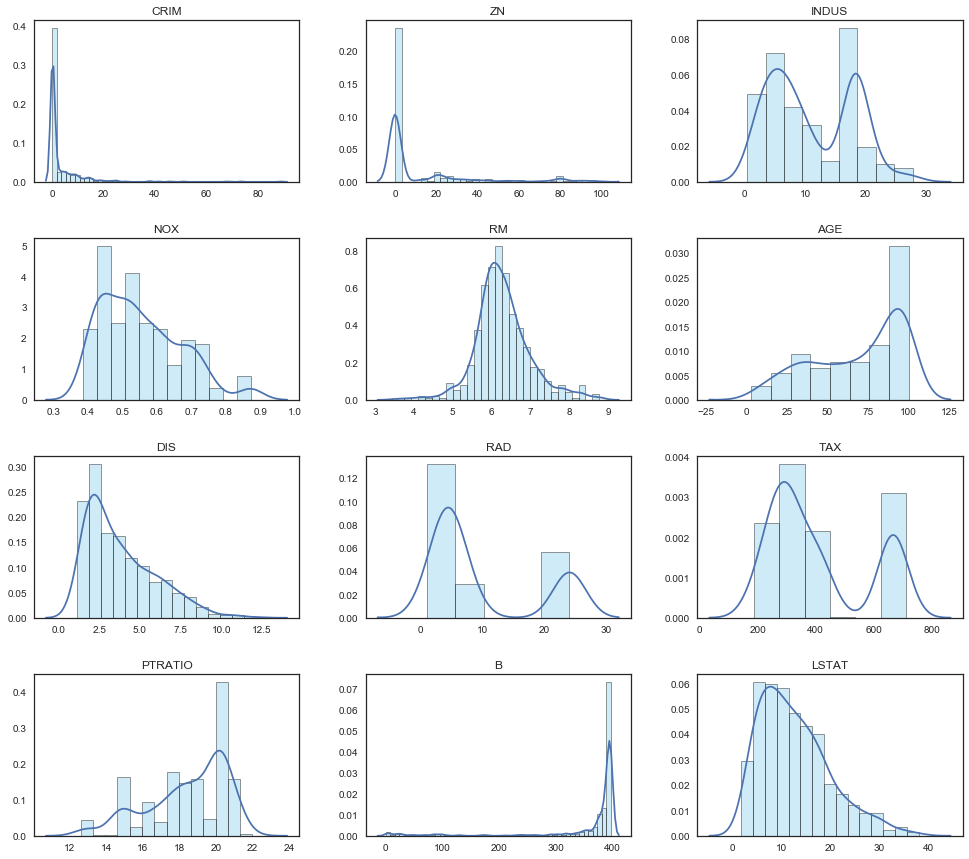

In [13]:
# Data Distribution Plot of all features
def dist_plot(df, features, n_rows, n_cols):
    fig = plt.figure(figsize=(15,15))
    for i, features in enumerate(features):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        sns.distplot(df[features],hist_kws=dict(edgecolor="k", linewidth=1,color='skyblue'))
        plt.title(features)
        plt.xlabel('')
dist_plot(df_boston, numerical_features, 4, 3)
# Subplots spacing
plt.subplots_adjust(left=0.04, right=0.9, wspace=0.25, hspace=0.35)

### Skewness and Kurtosis Features

Skew and kurtosis refer to the shape of a (normal) distribution. Skewness is a measure of the asymmetry of a distribution, and kurtosis is a measure of its curvature, specifically how peaked the curve is.

In [14]:
from scipy.stats import skew,kurtosis
skewed_features = df_boston[numerical_features].apply(lambda x: skew(x.dropna()))
kurtosis_ = df_boston[numerical_features].apply(lambda x: kurtosis(x.dropna()))
skewness_kurtosis = pd.DataFrame({'Skewness' :skewed_features,'Kurtosis':kurtosis_ })
skewness_kurtosis.sort_values('Skewness',ascending=False)

,Kurtosis,Skewness
CRIM,36.888110,5.222039
ZN,3.979949,2.219063
DIS,0.471299,1.008779
RAD,-0.870521,1.001833
LSTAT,0.476545,0.903771
NOX,-0.075864,0.727144
TAX,-1.142985,0.667968
RM,1.861027,0.402415
INDUS,-1.233218,0.294146
AGE,-0.970014,-0.597186


## Correlations with target variable

I made a scatterplot to know the correlation between independent variables with the target variable and to check for linearity on how each input attribute is able to predict the target variable.

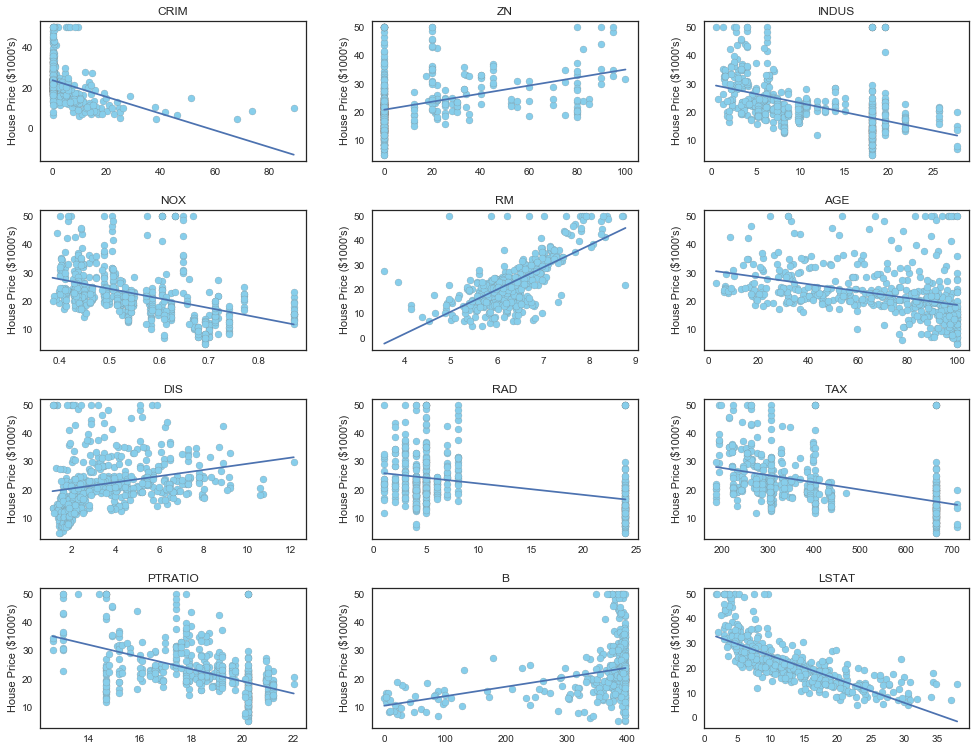

In [15]:
# Checking the linearity assumption may require plotting of predictor versus response variables.

def scatterplot(df, features, target, n_rows, n_cols):
    fig = plt.figure(figsize=(15,13))
    for i, features in enumerate(features):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        plt.plot(df[features],df[target],'o',fillstyle='full',markeredgecolor='gray',markeredgewidth=0.2,color='skyblue')
        plt.title(features)
        plt.ylabel("House Price ($1000's)")
        # Regression line
        plt.plot(np.unique(df[features]),np.poly1d(np.polyfit(df[features],df[target], 1))(np.unique(df[features])))  
        
scatterplot(df_boston, numerical_features, 'PRICE', 4, 3)
# Subplots spacing
plt.subplots_adjust(left=0.04, right=0.9, wspace=0.25, hspace=0.35)

#### Pearson's Correlation Coefficient (r)
The correlation coefficient **r** measures the strength and direction of a linear relationship between target variable 'PRICE' and features on a scatterplot. 

To interpret its value:
- **+0.30:**        A weak (positive) linear relationship
- **+0.50:**        A moderate (positive) relationship
- **+0.70:**        A strong (positive) linear relationship
- **+1:**           A perfect (positive) linear relationship
- **0:**            No linear relationship
- **-0.70:**        A strong (negative) linear relationship
- **-0.50:**        A moderate (negative) relationship
- **-0.30:**        A weak (negative) linear relationship
- ** –1:**          A perfect (negative) linear relationship


As you can see the number of rooms (RM) has the strongest positive correlation with the housing PRICE, while the percentage of lower status population (LSTAT) and the pupil-teacher ratio (PTRATIO), have strong negative correlation.

In [16]:
# Pearson's Correlation Coefficient
pearson = df_boston.corr(method='pearson')

# Assume target variable is the last, then remove corr with itself
corr_with_target = pearson.ix[-1][:-1]
# Sort the correlations by the absolute value. 
corr_ = pd.DataFrame({'Pearson(r)':corr_with_target[abs(corr_with_target).argsort()[::-1]]})
corr_

,Pearson(r)
LSTAT,-0.737663
RM,0.695360
PTRATIO,-0.507787
INDUS,-0.483725
TAX,-0.468536
NOX,-0.427321
CRIM,-0.385832
RAD,-0.381626
AGE,-0.376955
ZN,0.360445


## Features Observation

**Top 3 highly correlated features: > 0.5**

- Average number of rooms per dwelling (RM): 0.695360
 - There is a positive correlation between RM and Housing Prices. When RM increases, PRICE will increase, since the house with more room are bigger and more expensive.
- % lower status of the population (LSTAT): -0.737663 
 - Negative means that the two variables are negatively correlated. When LSTAT increases, the PRICE drops.  It is expected that areas with higher percentage of lower status population since this area is poor, the house price will be lower.
-  Pupil teacher ratio by town (PTRATIO) : -0.507787 
    - when the pupil teacher ratio goes up by 1 in a town, the price of the houses go down. Since, if the education resources are limited in the area, the house price will be lower.

** Based on the above scatterplot, I would interpret the following behaviour of some features:**

- crime rate (CRIM)
    - Area with low crime rate must have higher security, income, insurrance, and better life in general. Hence the price of houses must be affected by this factor. 
    - There is a lot of variation in housing prices. However, of the houses that are in a high-crime rate town, prices tend to be low.
- Nitric Oxide Concentrations (NOX)
    - Nitric oxide is an air pollutant generated by cars. There is a lot of variation in NOX concentration though generally there is a negative correlation and lower priced houses tend to be in areas of higher NOX.
- Weighted distances to five employment centers in the Boston region (DIS)
    - As you can see in the above plot,  the data points are highly aggregated near 2 to 3 weighted distances(DIS) even with a weighted distance of 2, the house prices are in the upper range as high as 50 thousand. Moreover, as the distance goes farther, there are fewer data points with high house prices.
        - **Most people are living near the employment center**.
        - **The houses that are very near to employment centres hold the highest price**. 
        - **The houses that are far away from 5 Boston employment centres don’t cost much**. 
- accessibility to the highway (RAD)
    - It is expected that areas with better highway accessibility have higher prices and might also be desirable as it is more convenient to go to work.

## Analysing Target Variable 
PRICE is roughly normally distributed, but with some outliers.

The normal probability plot should produce an approximately straight line if the points come from a normal distribution. The dot plot is the collection of points along the left y-axis. These are the values of the residuals. The purpose of the dot plot is to provide an indication the distribution of the residuals.


In [17]:
# Restore all RC params to original settings
sns.reset_orig()

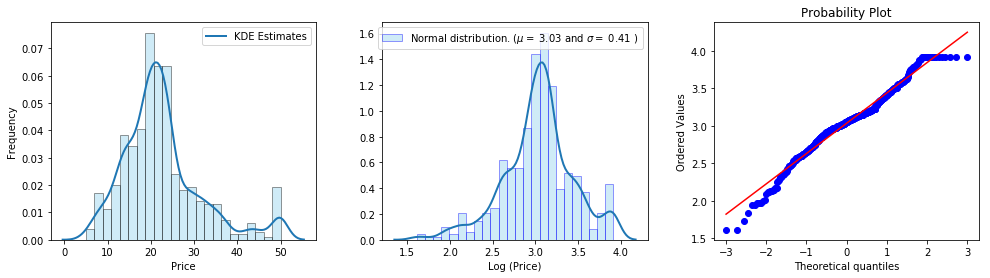

In [18]:
plt.subplots(1,3,figsize=(15,4))

plt.subplot(131)
from scipy import stats
from scipy.stats import norm
#(mu, sigma) = norm.fit(df_boston["PRICE"])
sns.distplot(df_boston['PRICE'],
            kde_kws={"lw":2,"label":"KDE Estimates"},
            hist_kws=dict(edgecolor="k", lw=1,color='skyblue'))
plt.ylabel('Frequency')
plt.xlabel('Price')

# New distribution log house price plot
plt.subplot(132)
log_price = np.log(df_boston["PRICE"])
sns.distplot(log_price,
             kde_kws={"lw":2},
             hist_kws=dict(edgecolor="b", lw=1,color='skyblue'))

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(log_price)
plt.legend(['Normal distribution. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.xlabel('Log (Price)')


# Probability Plot
plt.subplot(133)
stats.probplot(log_price, plot=plt)

# Subplots spacing
plt.subplots_adjust(left=0.04, right=0.9, wspace=0.25, hspace=0.35)
plt.show()

## Handling non-linearity problem
When the linear relationship does not hold we can either **transform** the data variables like *log, exponential transformation or normalisation* etc.


Transform the data if there is not a linear relationship between the two variables.:
- Log transformation of LSTAT represents close to normal distribution with mean and median next to each other. 
- Transformation of PTRATIO doesn't improve the distribution.

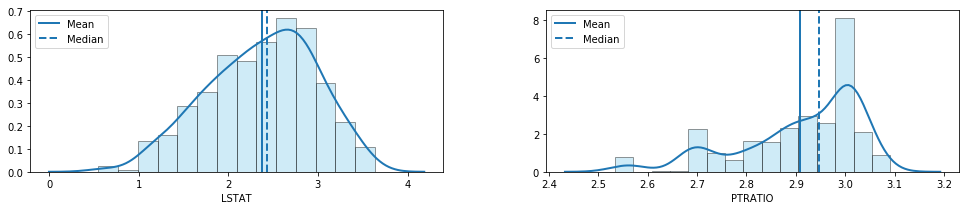

In [19]:
plt.subplots(1,2,figsize=(15,7))
for i, var in enumerate(['LSTAT', 'PTRATIO']):
    # Log-transformation
    plt.subplot(221 + i)
    sns.distplot(np.log(df_boston[var]),
                 kde_kws={"lw":2,"label":"KDE Estimates"},
                 hist_kws=dict(edgecolor="k", linewidth=1,color='skyblue'))
    mn = plt.axvline(np.log(df_boston[var]).mean(),  ls='solid', lw=2)
    md = plt.axvline(np.log(df_boston[var]).median(), ls='dashed', lw=2)
    plt.legend([mn,md],["Mean","Median"],loc="upper left") 
    
# Subplots spacing
plt.subplots_adjust(left=0.04, right=0.9, wspace=0.25, hspace=0.35)

In [20]:
# Style
plt.rcParams['figure.figsize'] = 10, 7

# Font size
plt.rc('axes', titlesize=18,labelsize=14)     
plt.rc('legend', fontsize=14)

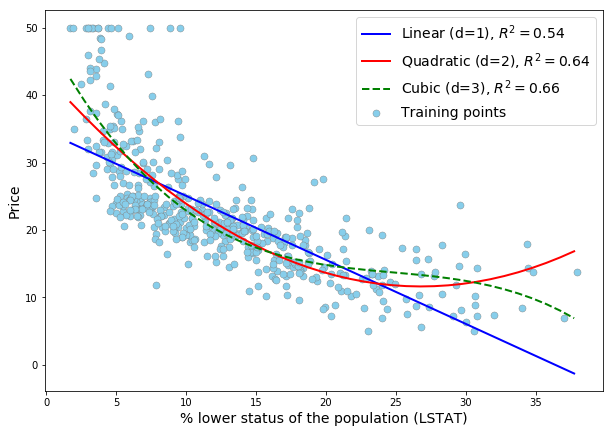

In [21]:
lstat = df_boston[['LSTAT']].values
y = df_boston['PRICE'].values
regr = LinearRegression()

# Fit linear, quadratic, and cubic polynomial models.
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
lstat_quad = quadratic.fit_transform(lstat)
lstat_cubic = cubic.fit_transform(lstat)

# linear fit
lstat_fit = np.arange(lstat.min(), lstat.max(), 1)[:, np.newaxis]
regr = regr.fit(lstat,y)
y_lin_fit = regr.predict(lstat_fit)
linear_r2 = r2_score(y, regr.predict(lstat))

# quadratic fit
regr = regr.fit(lstat_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(lstat_fit))
quadratic_r2 = r2_score(y, regr.predict(lstat_quad))

# cubic fit
regr = regr.fit(lstat_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(lstat_fit))
cubic_r2 = r2_score(y, regr.predict(lstat_cubic))

#Scatter Plot
plt.scatter(lstat, y,label='Training points',lw=0.4,edgecolor='gray',s=50,c='skyblue')

# Legend
plt.plot(lstat_fit, y_lin_fit,
        label='Linear (d=1), $R^2=%.2f$'
        % linear_r2,
        color='blue',
        lw=2,
        linestyle='-')
plt.plot(lstat_fit, y_quad_fit,
        label='Quadratic (d=2), $R^2=%.2f$'
        % quadratic_r2,
        color='red',
        lw=2,
        linestyle='-')
plt.plot(lstat_fit, y_cubic_fit,
        label='Cubic (d=3), $R^2=%.2f$'
        % cubic_r2,
        color='green',
        lw=2,
        linestyle='--')
plt.legend(loc='upper right')

# Label
plt.xlabel('% lower status of the population (LSTAT)')
plt.ylabel('Price')
plt.show()

Here a log transform of the LSTAT feature and taking the square root of the price would project the data onto a linear feature space.

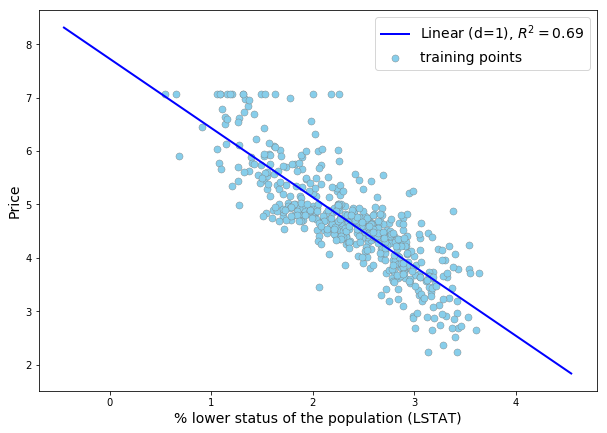

In [22]:
# Transform features
lstat_log = np.log(lstat)
y_sqrt = np.sqrt(y)

# Fit features
lstat_fit = np.arange(lstat_log.min()-1, lstat_log.max()+1, 1)[:, np.newaxis]
regr = regr.fit(lstat_log, y_sqrt)
y_lin_fit = regr.predict(lstat_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(lstat_log))

# Plot
plt.scatter(lstat_log, y_sqrt,label='training points',lw=0.4,edgecolor='gray',s=50,c='skyblue')
plt.plot(lstat_fit, y_lin_fit,label='Linear (d=1), $R^2=%.2f$'% linear_r2,color='blue',
lw=2)

# Label
plt.xlabel('% lower status of the population (LSTAT)')
plt.ylabel('Price')

# Legend
plt.legend(loc='upper right')
plt.show()

## Outlier 
Outlier is an observation or point that is distant from other observations/points. There are **parametric methods** and **non-parametric methods** that are employed to identify outliers. 
- Parametric methods involve assumption of some underlying distribution such as normal distribution 
    - When there are no outliers and the distribution is normal, standard parametric tests (T tests or ANOVA) are more powerful.
- Non-Parametric 
    - non-parametric tests is that they are more robust to such outliers.
    
Additionally, you could do:
- Univariate analysis by studying a single variable at a time.
- Multivariate analysis where you would study more than one variable at the same time to identify outliers.

Now I made a box plot to see if there are outliers for each column of features in the Boston housing data set, there seems to be many outliers in the column per capita crime rate by town **(CRIM)** and 12 (housing prices). 

**Note: ** The data in the column **'CHAS'** are categorical data (if tract bounds Charles River or not), so the column is empty in the boxplot.


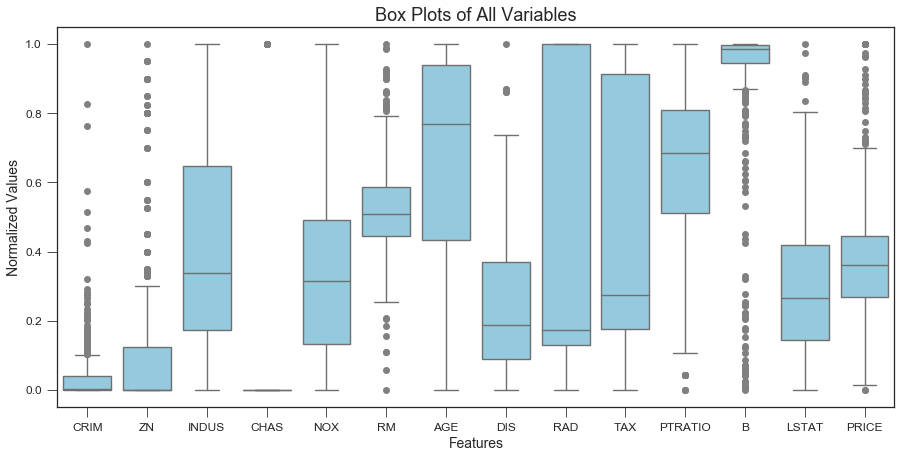

In [23]:
from sklearn import preprocessing

# Box-plot Style
sns.set_context("paper", rc={'xtick.labelsize': 12, 'ytick.labelsize': 12,'axes.titlesize':18,'axes.labelsize':14}) 
sns.set_style("ticks", {'xtick.major.size': 10, 'ytick.major.size': 10})

# Normalized the all columns of features
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(df_boston)
df_boston_normalized = pd.DataFrame(x_scaled)

# Change Columns name
df_boston_normalized.columns = ['CRIM', 'ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                                'DIS','RAD', 'TAX', 'PTRATIO' ,'B', 'LSTAT','PRICE']
## Normalized Box-plot: A simple non-parametric approach box plot to identify the outliers.
plt.rc("figure", figsize=(15, 7))
flierprops = dict(marker='o',markersize=7,markerfacecolor='gray')
bxplt = sns.boxplot(data=df_boston_normalized,color='skyblue',flierprops=flierprops)
plt.title('Box Plots of All Variables')
plt.ylabel('Normalized Values')
plt.xlabel('Features')
plt.show()

## Correlations among Features (Multicollinearity)
**Predictor variables should be linearly independent of each other.**

It might be interesting to select some strong correlations between features. From the correlation feature pairs and the heatmap we can see that few variables are highly correlated, like RAD and TAX with a correlation value of 0.91. DIS is also highly negatively corelated with NOX and AGE too.

In [24]:
# all except target
attrs = pearson.iloc[:-1,:-1] 

# only important correlations and not auto-correlations
threshold = 0.5
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]).unstack().dropna().to_dict()
unique_important_corrs = pd.DataFrame(list(set([(tuple(sorted(key)), important_corrs[key])\
              for key in important_corrs])), columns=['Features Pair', 'Correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[abs(unique_important_corrs['Correlation']).argsort()[::-1]]
print(unique_important_corrs.to_string(index=False))

Features Pair  Correlation
    (RAD, TAX)     0.910228
    (DIS, NOX)    -0.769230
  (INDUS, NOX)     0.763651
    (AGE, DIS)    -0.747881
    (AGE, NOX)     0.731470
  (INDUS, TAX)     0.720760
  (DIS, INDUS)    -0.708027
    (NOX, TAX)     0.668023
     (DIS, ZN)     0.664408
  (AGE, INDUS)     0.644779
   (CRIM, RAD)     0.622029
   (LSTAT, RM)    -0.613808
    (NOX, RAD)     0.611441
(INDUS, LSTAT)     0.603800
  (AGE, LSTAT)     0.602339
  (INDUS, RAD)     0.595129
  (LSTAT, NOX)     0.590879
   (CRIM, TAX)     0.579564
     (AGE, ZN)    -0.569537
  (LSTAT, TAX)     0.543993
    (DIS, TAX)    -0.534432
   (INDUS, ZN)    -0.533828
     (NOX, ZN)    -0.516604
    (AGE, TAX)     0.506456


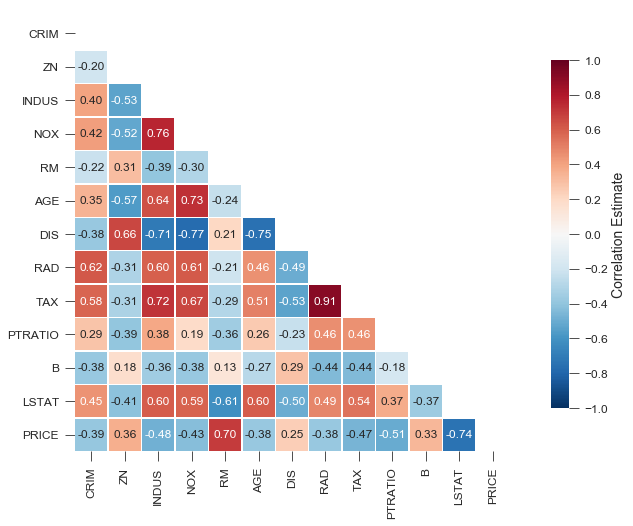

In [25]:
# Compute the correlation matrix
corr = df_boston.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap='RdBu_r', vmax=1,center=0, fmt='.2f',
            square=True, linewidths=.5, annot_kws={'size': 12}, cbar_kws={'shrink': .8,'label': 'Correlation Estimate'})

#colorbar range
cbar = ax.collections[0].colorbar
cbar.set_ticks([1,.8,.6,.4,.2,0,-.2,-.4,-.6,-.8,-1 ])

## There are two main ways to perform Linear Regression in Python:
- statsmodel
- scikit-learn

## Ordinary Least Squares(OLS) using statsmodels
How to obtain best fit line.?

In [26]:
# For statistics. Requires statsmodels
import statsmodels.api as sm

# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm


Let us examine the calculated p-value for each feature in the linear model. Any feature which is not significant (p-value > 0.05) is not contributing signicantly for the model, probably due to multicollinearity among other features.

**Some of the most commonly used Stepwise regression methods are:**

- Standard stepwise regression does two things. It adds and removes predictors as needed for each step.
- Forward selection starts with most significant predictor in the model and adds variable for each step.
- Backward elimination starts with all predictors in the model and removes the least significant variable for each step.

In [27]:
import statsmodels.formula.api as smf
mod = smf.ols(formula='np.log(PRICE) ~ CRIM + CHAS  + RM + np.log(DIS) + np.log(LSTAT) + PTRATIO + RAD + NOX' , data=df_boston)
model = mod.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(PRICE)   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     232.0
Date:                Fri, 17 Nov 2017   Prob (F-statistic):          1.95e-162
Time:                        08:41:29   Log-Likelihood:                 128.62
No. Observations:                 506   AIC:                            -239.2
Df Residuals:                     497   BIC:                            -201.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.9531      0.209     23.689

## Scikit-Learn
I am going to  fit a linear regression model and predict the Boston Housing Prices. I will use the **least squares method** as the way to estimate the coefficients.

In [28]:
# Create a LinearRegression Object and store in a variable called 'lm'.
lm = LinearRegression()

In [29]:
df_log = df_boston[['DIS', 'LSTAT']].applymap(lambda x: np.log(x))
df_boston['DIS'] = df_log['DIS']
df_boston['LSTAT'] = df_log['LSTAT']

X = df_boston[['CRIM', 'CHAS',  'RM' , 'DIS' , 'LSTAT' , 'PTRATIO' , 'RAD' , 'NOX']]
#X = df_boston.drop(['PRICE'],axis=1)
y = np.log(df_boston['PRICE'])

In [30]:
# Fit a Linear Model.
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Returns the coefficient of determination $R^2$. A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model.  $R^2$ of the equation is --- which is good, we want this value to be as close to 1 as possible for better predictions.

In [31]:
print ("R-squared: {:.3f}.".format(lm.score(X,y)))

R-squared: 0.789.


- The coefficients describe the relationship between each independent variable and the dependent variable.
- The p-values for the coefficients indicate whether these relationships are statistically significant.

In [32]:
# Intercept / Constant
print('The Estimated Intercept Coefficient is: %.2f '% lm.intercept_)

# Coefficient Estimates
print('The Number of Coefficient: %d ' %len(lm.coef_))

# I created DataFrame that contains Features and Estimated Coefficients.
est_coeff = pd.DataFrame(lm.coef_, index = [X.columns[:]], columns=['Coefficient Estimates'])
est_coeff

The Estimated Intercept Coefficient is: 4.95 
The Number of Coefficient: 8 


,Coefficient Estimates
CRIM,-0.013317
CHAS,0.111008
RM,0.071565
DIS,-0.214131
LSTAT,-0.389678
PTRATIO,-0.034299
RAD,0.003816
NOX,-0.997400


## Splitting the dataset into the Training and Test set
Splitting into training and test sets is to verify how well would your model perform on unseen data, train the model on training set and verify its performance on the test set.  

In [33]:
from sklearn.model_selection import train_test_split

**Try an 70/30 split**

Split the first 70% of it into a training set, and the last 30% into a test set. 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 8) (152, 8) (354,) (152,)


## Fitting Multiple Linear Regression to the Training set

Fit a model to your training set, rather than the entire dataset.

In [36]:
# Fit the model on the training data
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Scoring Model
**Goodness of Fit**

A common method of measuring the accuracy of regression models is to use the R-squared statistic.

### Coefficient of Determination **$r^2$** 
A measure of how well the regression line fit the data. A lower  R-squared indicates that the model has more error.

- $SSR = \sum_{i=1}^{n}(\hat{y}_i-\bar{y})^2$  (**Regression sum of squares**)  
- $SSE = \sum_{i=1}^{n}({y}_i-\hat{y}_i)^2$  (**Error sum of squares**)
- $SSTO = \sum_{i=1}^{n}({y}_i-\bar{y})^2$   (**Total sum of squares**)


$$ r^2 = \frac{SSR}{SSTO}= 1-\frac{SSE}{SSTO}$$
 
- A low R-squared isn’t necessarily bad and a high R-squared isn’t necessarily good.
- R-squared will never decrease or change when new variables added to the model.

In [37]:
# R-squared can be determined using test set and the model’s score method.
score_train = lm.score(X_train, y_train)
score_test = lm.score(X_test, y_test)

print('Training set accuracy:{}%'.format(int(round(score_train * 100))))
print('Test set accuracy:{}%'.format(int(round(score_test * 100))))

Training set accuracy:82%
Test set accuracy:72%


## Prediction on the Train and Test Set
The predict() function that make predictions on new data. 


In [38]:
# Predict on the training set
y_pred_train= lm.predict(X_train)
# Predict on the test set, which is not use for training the model.
y_pred_test = lm.predict(X_test)

Now that you have predictions on the test set,I will use this predictions to calculate an error metric in this case (RMSE) on the test set and see how the model performs with unseen data.

## Performance Regression Evaluation Metrics

**Mean Squared Error** (MSE)

$${\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Root Mean Squared Error** (RMSE) is the square root of the average of squared differences between prediction and actual observation:
- The standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line the data points are. 
- RMSE is a measure of how spread out these residuals are. In other words, how much error there is between predicted and observed values.

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Indeed, the test data's RMSE is higher than training data
- It overfit the training set and the test set contains data that the model hasn’t seen before.

In [39]:
print('Fit a model X_train, and calculate RMSE with y_train: %.3f '% np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('Fit a model X_test, and calculate RMSE with y_test: %.3f '% np.sqrt(mean_squared_error(y_test,y_pred_test)))

Fit a model X_train, and calculate RMSE with y_train: 0.173 
Fit a model X_test, and calculate RMSE with y_test: 0.221 


In [40]:
print ("Root Mean Squared Error (RMSE): {:.3f}".format(np.sqrt(mean_squared_error(y_test,y_pred_test))))

Root Mean Squared Error (RMSE): 0.221


Then I made a scatterplot to compare actual prices and the predicted prices. Some of the houses with the highest prices shown as **outliers**.

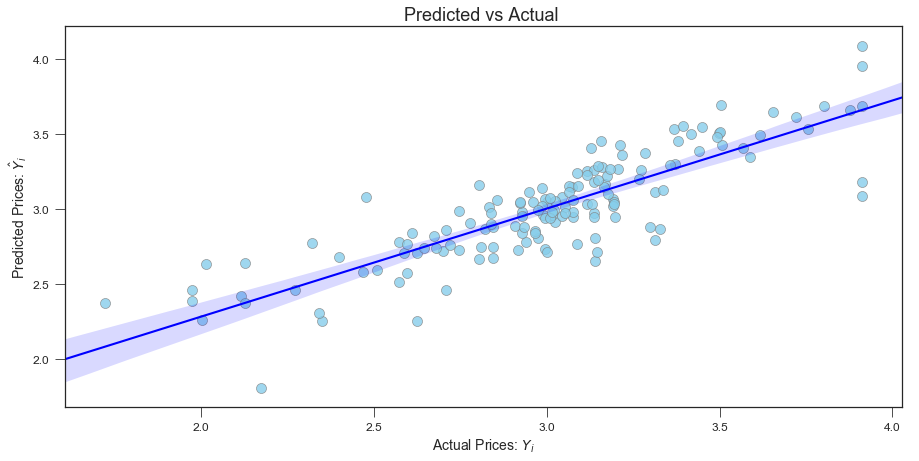

In [41]:
sns.regplot(y_test,y_pred_test,data=df_boston, marker='o', color='skyblue', 
            line_kws={'color': 'blue'},
            scatter_kws={'s':100,'lw':0.7,'edgecolor':'gray'})
            
plt.title('Predicted vs Actual ')
plt.xlabel('Actual Prices: $Y_i$')
plt.ylabel('Predicted Prices: $\hat{Y}_i$')
plt.show()

## Residual Distribution
Residual diagnostics can be performed to check that errors have a constant variance, are normally distributed and not independent. For this purpose, probability plot, histograms and scatterplots will be used.

- Residual/Error terms should have a Normal Distribution.
    - A histogram of the residuals to see if it appears to be bell- shaped.
    

- By examining a normal **probability plot of the residuals**. Essentially, the ordered (standardized) residuals are plotted against theoretical expected values for a sample from a standard normal curve population. A **straight-line pattern** for a normal probability plot (NPP) indicates that the assumption of normality is reasonable. (The errors appear to be normally distributed)

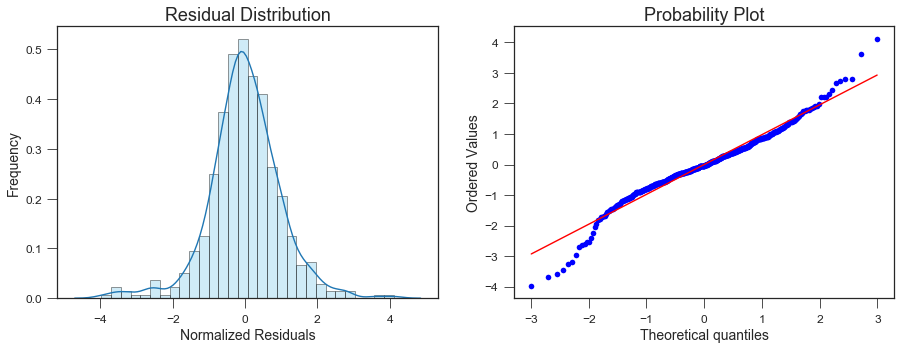

In [42]:
plt.subplots(1,2,figsize=(15,5))
plt.subplot(121)
sns.distplot(model.resid_pearson,hist_kws=dict(edgecolor="k", linewidth=1,color='skyblue'))
plt.title('Residual Distribution')
plt.xlabel('Normalized Residuals')
plt.ylabel('Frequency')
plt.subplot(122)
stats.probplot(model.resid_pearson, plot=plt);

## Residual Plots
Visualize the distribution of ERROR to diagnose heteroscedasticity (Checking for constant variance)

A residual scatter plot is a figure that shows one axis for predicted values and one axis for errors of prediction. A curved pattern for the residuals versus fits (predicted values) plot indicates that the wrong type of equation has been used. 

*But It appears that majority of the residuals are randomly allocated above and below the horizontal axis. The figure below shows a random displacement of scores that take on a rectangular shape with no clustering or systematic pattern.  The figure shows the assumption of homoscedasticity(constant variance) is met.* 

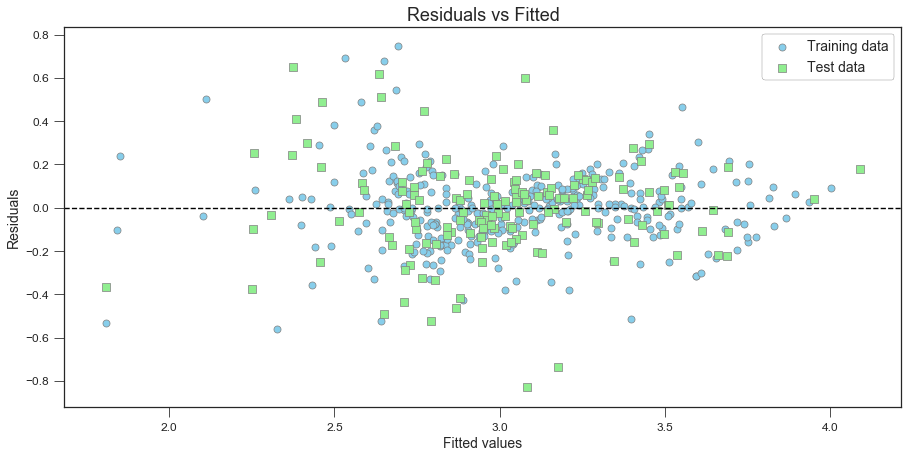

In [43]:
# Font size
plt.rc('axes', titlesize=18,labelsize=14)     
plt.rc('legend', fontsize=14,)

# Residual Plot
plt.scatter(y_pred_train, ( y_pred_train-y_train) , c='skyblue', lw=0.7,marker='o',edgecolor='gray',s=50,label='Training data')
plt.scatter(y_pred_test, (y_pred_test-y_test),c='lightgreen', lw=0.7,marker='s',edgecolor='gray',s=50,label='Test data')
plt.axhline(y=0, color='k', linestyle='--')

# Label
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Legend
lgd=plt.legend(loc='upper right',frameon=True)
lgd.get_frame().set_edgecolor('k')
plt.show()